## Generative Adversarial Network (GAN) 

In [398]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand, randn, randint, uniform
%matplotlib inline

#### Generate random sample

In [566]:
def real_samples(n=100, a=0.5):
    X=[]
    # generate an array of random numbers between -a and +a
    x = rand(n) -a
    #x = np.linspace(-a,a, n)
    # create a function: y= exp(-ax)
    for i in range(n):
        a = 2.0 #uniform(0.1, 1.0)
        c = np.math.pi
        x2 = np.exp(-a*x[i])
        X.append([x[i], x2])
    
    y = np.ones((n, 1)) # label class
    return np.array(X), y

In [567]:
X,y=real_samples(100, 1)

In [552]:
X[0:2], y[0:2]

(array([[-0.16028682,  1.37791797],
        [-0.92504803,  6.36043051]]),
 array([[1.],
        [1.]]))

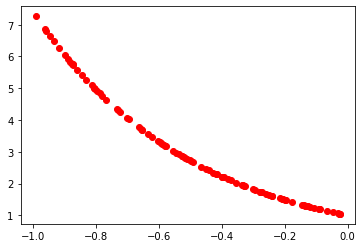

In [568]:
plt.scatter(X[:,0], X[:,1], color='red')

In [554]:
# generate random noise
def generate_noise(ndim, n):
    x = randn(ndim * n)
    x = x.reshape(n, ndim)
    return x

In [555]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.utils import plot_model

In [556]:
# define discriminator model
def discriminator(ndim=2):
    model = Sequential()
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform', input_dim=ndim)) #
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [557]:
#model = discriminator()
# summarize the model
#model.summary()
# plot the model
#plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [558]:
def generator(n_intputs=2, n_outputs=2):
    model = Sequential()
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform', input_dim=n_intputs))
    model.add(Dense(n_outputs, activation='linear'))
    return model

In [559]:
# Adversarial model
def gan(discriminator,generator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [560]:
#model = generator()

#model.summary()
# plot the model
#plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [561]:
# generate fake deta, which are the output of the generator model
def fake_samples(generator, ndim, n):
    x = generate_noise(ndim, n)
    X = generator.predict(x)
    y = np.zeros((n, 1)) # labels
    return X, y


In [562]:
def monitor_output(discriminator, generator, ndim, epoch, n=100):
    # create real samples
    xr, yr = real_samples(n)
    
    # evaluate discriminator on real examples
    r_loss, r_acc = discriminator.evaluate(xr, yr, verbose=0)
    
    # create fake samples
    xf, yf = fake_samples(generator, ndim, n)
    
    # evaluate discriminator on fake examples
    f_loss, f_acc = discriminator.evaluate(xf, yf, verbose=0)
    
    # print accuracy
    print(epoch, r_loss, r_acc , f_loss, f_acc)
    
    # plot real and fake output
    plt.scatter(xr[:, 0], xr[:, 1], color='red')
    plt.scatter(xf[:, 0], xf[:, 1], color='black')
    plt.show()

In [563]:
# iteration loop

In [564]:
def train_gan(discriminator, generator, gan, ndim, epochs=2000, batch=128, out_interval=400):
    # determine half the size of one batch, for updating the discriminator
    half_batch = int(batch / 2)
    # manually enumerate epochs
    for i in range(epochs):
        # create real samples
        x_real, y_real = real_samples(half_batch)
        # create fake samples as outpout for generator
        x_fake, y_fake = fake_samples(generator, ndim, half_batch)
        # update discriminator
        discriminator.train_on_batch(x_real, y_real)
        discriminator.train_on_batch(x_fake, y_fake)
        # pcreate noise data as input for the generator
        x_gan = generate_noise(ndim, batch)
        # create inverted labels for the fake samples
        y_gan = np.ones((batch, 1))
        # update generator via the discriminator loss
        gan.train_on_batch(x_gan, y_gan)
        # evaluate the model every n_eval epochs
        if (i+1) % out_interval == 0:
            monitor_output(discriminator, generator, ndim, i+1)

400 0.6509634256362915 1.0 0.7318186163902283 0.029999999329447746


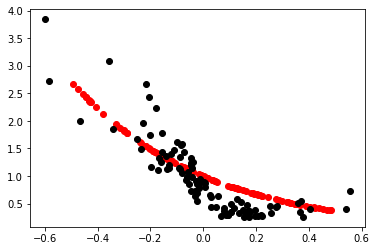

800 0.6855348348617554 0.7900000214576721 0.6917199492454529 0.5


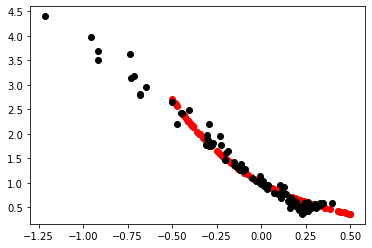

1200 0.6791692972183228 0.6299999952316284 0.689065158367157 0.6800000071525574


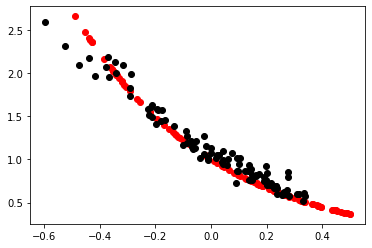

1600 0.6890462636947632 0.3100000023841858 0.6948437690734863 0.6299999952316284


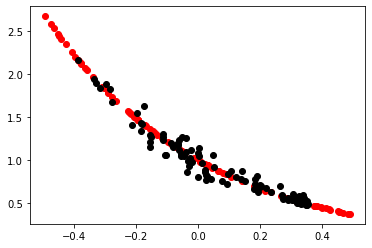

2000 0.7406485080718994 0.12999999523162842 0.6517472863197327 0.8100000023841858


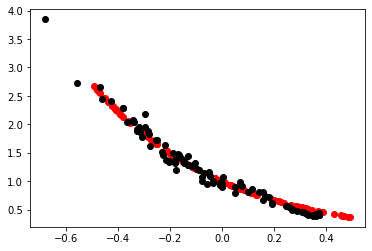

In [565]:
# size of the latent space
ndim =2
# create the discriminator
D = discriminator()
# create the generator
G =generator(ndim)
# create the gan
gan_model = gan(D,G)
# train model
train_gan(D,G, gan_model, ndim)

In [1]:
# Ref: https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-1-dimensional-function-from-scratch-in-keras/